In [242]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [243]:
database = pd.read_csv(r"../../data/metadata.csv")

database[['smoke','drink','pesticide','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','itch','grew','hurt','changed','bleed','elevation','biopsed']] = database[['smoke','drink','pesticide','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','itch','grew','hurt','changed','bleed','elevation','biopsed']].astype("bool")

database = database.dropna().drop(['patient_id','lesion_id','img_id'], axis = 1)

database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 1 to 2296
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   smoke                1474 non-null   bool   
 1   drink                1474 non-null   bool   
 2   background_father    1474 non-null   object 
 3   background_mother    1474 non-null   object 
 4   age                  1474 non-null   int64  
 5   pesticide            1474 non-null   bool   
 6   gender               1474 non-null   object 
 7   skin_cancer_history  1474 non-null   bool   
 8   cancer_history       1474 non-null   bool   
 9   has_piped_water      1474 non-null   bool   
 10  has_sewage_system    1474 non-null   bool   
 11  fitspatrick          1474 non-null   float64
 12  region               1474 non-null   object 
 13  diameter_1           1474 non-null   float64
 14  diameter_2           1474 non-null   float64
 15  diagnostic           1474 non-null   o

# Data Exploration

In [244]:
df = database.copy()

df.head()

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,biopsed
1,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,True,True,True,True,True
4,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,True,True,True,True,True
6,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,True,3.0,FACE,15.0,10.0,BCC,True,True,True,True,True,True,True
7,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,False,1.0,FACE,15.0,10.0,BCC,True,True,True,True,True,True,True
9,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,True,1.0,FOREARM,9.0,7.0,ACK,True,True,True,True,True,True,False


In [245]:
df['region'] = df['region'].apply(lambda x: 'OUTROS' if x in ['THIGH','LIP','FOOT','ABDOMEN','SCALP'] else x)
df['background_father'] = df['background_father'].apply(lambda x: 'OUTROS' if x in ['ISRAEL','SPAIN','AUSTRIA','CZECH','BRASIL','POLAND','PORTUGAL','NETHERLANDS','NORWAY','FRANCE'] else ('BRAZIL' if x == 'BRASIL' else x))
df['background_mother'] = df['background_mother'].apply(lambda x: 'OUTROS' if x in ['ISRAEL','SPAIN','AUSTRIA','CZECH','BRASIL','POLAND','PORTUGAL','NETHERLANDS','NORWAY','FRANCE'] else ('BRAZIL' if x == 'BRASIL' else x))

df['is_cancer'] = df['diagnostic'].apply(lambda x: 0 if x in ['ACK','NEV','SEK'] else 1)


df.head()

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,biopsed,is_cancer
1,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,True,True,True,True,True,1
4,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,True,True,True,True,True,1
6,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,True,3.0,FACE,15.0,10.0,BCC,True,True,True,True,True,True,True,1
7,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,False,1.0,FACE,15.0,10.0,BCC,True,True,True,True,True,True,True,1
9,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,True,1.0,FOREARM,9.0,7.0,ACK,True,True,True,True,True,True,False,0


In [246]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(categories='auto'), ['region','gender']), remainder='passthrough')

transformed = transformer.fit_transform(df.drop(['diagnostic','biopsed','background_father','background_mother'], axis = 1))

transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_df.head()

,onehotencoder__x0_ARM,onehotencoder__x0_BACK,onehotencoder__x0_CHEST,onehotencoder__x0_EAR,onehotencoder__x0_FACE,onehotencoder__x0_FOREARM,onehotencoder__x0_HAND,onehotencoder__x0_NECK,onehotencoder__x0_NOSE,onehotencoder__x0_OUTROS,onehotencoder__x1_FEMALE,onehotencoder__x1_MALE,smoke,drink,age,pesticide,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,diameter_1,diameter_2,itch,grew,hurt,changed,bleed,elevation,is_cancer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False,False,55,False,True,True,True,True,3.0,6.0,5.0,True,True,True,True,True,True,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,False,True,79,False,True,False,False,False,1.0,5.0,5.0,True,True,True,True,True,True,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,True,52,False,False,True,True,True,3.0,15.0,10.0,True,True,True,True,True,True,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,False,74,True,False,False,False,False,1.0,15.0,10.0,True,True,True,True,True,True,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,False,True,58,True,True,True,True,True,1.0,9.0,7.0,True,True,True,True,True,True,0


# Train Test Split

In [247]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    transformed_df,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

In [248]:
X_train = train_set.drop(columns=['is_cancer']).copy()
y_train = train_set['is_cancer'].astype('int64').copy()

X_test = test_set.drop(columns=['is_cancer']).copy()
y_test = test_set['is_cancer'].astype('int64').copy()

In [249]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Predict

# Logistic Regression

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import metrics

log_reg = LogisticRegression(random_state=RANDOM_SEED)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

y_pred = np.round(abs(y_pred))

print("F1 score:", f1_score(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

F1 score: 0.8403361344537815
Accuracy: 0.7423728813559322
Precision: 0.7604562737642585
Recall: 0.9389671361502347
ROC AUC: 0.5853372266117027


c:\Users\samuel.nporto\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [251]:
log_reg = LogisticRegression(random_state=RANDOM_SEED)

log_scores = cross_val_score(
    log_reg,  # modelo
    X_train,  # X_train
    y_train,  # y_train
    scoring='roc_auc',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

def display_scores(scores):
    print('Scores:', scores.round(decimals=2))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
    return scores.mean()


display_scores(log_scores)

Scores: [0.8  0.79 0.72 0.68 0.67 0.72 0.74 0.75 0.75 0.64]
Mean: 0.7250379349670228
Standard deviation: 0.047719812259470404


0.7250379349670228

# Random Forest Classifier

In [252]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=110)

rfc_clf.fit(X_train, y_train)

y_pred = rfc_clf.predict(X_test)

y_pred = np.round(abs(y_pred))

print("F1 score:", f1_score(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

F1 score: 0.8873873873873873
Accuracy: 0.8305084745762712
Precision: 0.8528138528138528
Recall: 0.9248826291079812
ROC AUC: 0.755124241383259


In [253]:
pd.Series(rfc_clf.feature_importances_,X_test.columns).sort_values(ascending=False)

age                          0.196373
diameter_1                   0.155295
diameter_2                   0.132078
fitspatrick                  0.068288
onehotencoder__x0_FOREARM    0.037654
cancer_history               0.036927
skin_cancer_history          0.036131
drink                        0.032972
pesticide                    0.030076
has_sewage_system            0.028231
has_piped_water              0.027508
onehotencoder__x0_HAND       0.024388
onehotencoder__x0_FACE       0.023036
onehotencoder__x0_OUTROS     0.021885
onehotencoder__x0_NOSE       0.021547
onehotencoder__x1_FEMALE     0.019314
smoke                        0.019093
onehotencoder__x1_MALE       0.018890
onehotencoder__x0_BACK       0.018224
onehotencoder__x0_ARM        0.016946
onehotencoder__x0_CHEST      0.015924
onehotencoder__x0_NECK       0.011360
onehotencoder__x0_EAR        0.007860
itch                         0.000000
grew                         0.000000
hurt                         0.000000
changed     

In [254]:
rfc_clf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=110)

log_scores = cross_val_score(
    rfc_clf,  # modelo
    X_train.drop(['itch','grew','hurt','changed','bleed','elevation',], axis = 1),  # X_train
    y_train,  # y_train
    scoring='roc_auc',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

display_scores(log_scores)

Scores: [0.86 0.87 0.84 0.8  0.85 0.83 0.85 0.87 0.89 0.75]
Mean: 0.8420720132358064
Standard deviation: 0.03869839878504169


0.8420720132358064

# SVM

In [255]:
from sklearn.svm import SVC
from matplotlib.cm import rainbow

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    
    svc_cv = cross_val_score(
        svc_classifier,  # modelo
        X_train,  # X_train
        y_train,  # y_train
        scoring='roc_auc',  # metrica de interesse
        cv=10,  # Quantas partições eu quero
        n_jobs=-1,  # Use todos os cores da maquina!
    )
    
    print(kernels[i])
    score = display_scores(svc_cv)
    print('\n')
    
    svc_scores.append(score)

linear
Scores: [0.79 0.77 0.67 0.71 0.7  0.69 0.73 0.71 0.71 0.63]
Mean: 0.7122507612274019
Standard deviation: 0.043105158738070797


poly
Scores: [0.73 0.68 0.69 0.7  0.65 0.64 0.73 0.72 0.73 0.68]
Mean: 0.6960442017505422
Standard deviation: 0.03295061929676865


rbf
Scores: [0.67 0.65 0.71 0.76 0.62 0.68 0.73 0.77 0.64 0.51]
Mean: 0.6748490325951394
Standard deviation: 0.0735916919886198


sigmoid
Scores: [0.49 0.53 0.51 0.52 0.41 0.46 0.59 0.54 0.53 0.45]
Mean: 0.5023987792271998
Standard deviation: 0.048881987454734314




Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

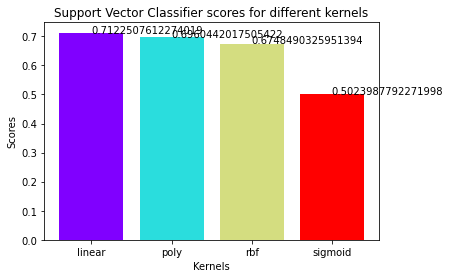

In [256]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')